# Data Science 2 - ESEO DSMT 

## Features Selection

### 23 Nov 2021  -- Prof. R. LONGO

1. VarianceThreshold
2. Select K Best
3. Select From Model
\
    3.1 Select From Model using  directly feature_importances_  values (prefit)
    \
    3.2 Select From Model using 'standard' thresholds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

### 1. VarianceThreshold

In [2]:
from sklearn.feature_selection import VarianceThreshold

In [3]:
from sklearn.datasets import load_iris
seed=1
iris = load_iris()
X = iris.data
y = iris.target

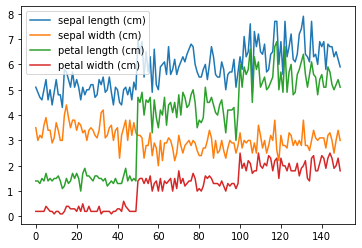

In [4]:
plt.plot(X)
plt.legend(iris.feature_names)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=seed)

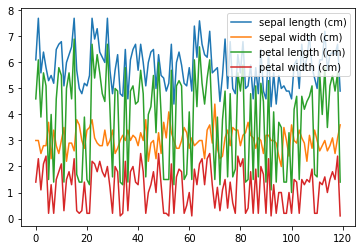

In [6]:
plt.plot(X_train)
plt.legend(iris.feature_names)

In [7]:
selector = VarianceThreshold(threshold=0.6)
selector.fit(X_train)

VarianceThreshold(threshold=0.6)

In [8]:
print(iris.feature_names)
print(selector.get_support())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ True False  True False]


In [9]:
np.array(iris.feature_names)[selector.get_support()] # bool indexing

array(['sepal length (cm)', 'petal length (cm)'], dtype='<U17')

In [10]:
print('features variance : ', selector.variances_) #np.var(X, axis=0)

features variance :  [0.68769722 0.17521597 3.11406667 0.59821597]


## 2. Select K Best

In [12]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [13]:
#selector = SelectKBest(f_classif,k=3) # ANOVA
selector = SelectKBest(chi2,k=2)

In [14]:
selector.fit_transform(X_train,y_train);
selector.get_support()

array([False, False,  True,  True])

## 3. Select From Model

In [15]:
from sklearn.feature_selection import SelectFromModel

#### 3.1 Select From Model using directly feature_importances_  values (prefit)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

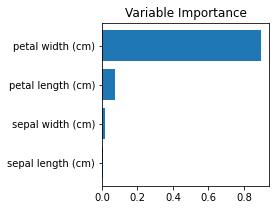

In [17]:
plt.figure(figsize=(3,3))
var_importance = model.feature_importances_
#var_importance_rel = 100.0 * (var_importance / var_importance.sum())
a= np.array(iris.feature_names)

sorted_idx = np.argsort(var_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, var_importance[sorted_idx], align='center')
plt.yticks(pos, a[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [18]:
var_importance

array([0.00752037, 0.01880092, 0.07584566, 0.89783305])

In [19]:
th=0.05
selection = SelectFromModel(model, threshold=th, prefit=True) # Features whose importance is greater or equal than threshold are kept 
select_X_train = selection.transform(X_train)

selection_model = DecisionTreeClassifier(random_state=seed)

selection_model.fit(select_X_train, y_train)
select_X_test = selection.transform(X_test)

selection_model.score(select_X_test,y_test)

0.9666666666666667

In [20]:
selection.get_support()


array([False, False,  True,  True])

#### 3.2  Select From Model using 'standard' thresholds


In [21]:

X = iris.data
y = iris.target
selector = SelectFromModel(DecisionTreeClassifier(random_state=10), threshold='mean')

select_X_train = selector.fit_transform(X_train,y_train);

select_X_test = selector.transform(X_test);

select_X_test.shape

(30, 1)

In [22]:
model = DecisionTreeClassifier(random_state=10)
model.fit(select_X_train, y_train)
model.score(select_X_test,y_test)

0.9666666666666667